Task-1

**Titanic Survival Prediction:**

OVERVIEW:
* Titanic Survival Prediction is a classic data science project based on the Titanic dataset, which contains information about passengers who were on board the Titanic, including whether they survived or not.

PROBLEM STATEMENT:

* The goal is to build a predictive model that can predict whether a passenger would have survived the Titanic disaster based on features like age, gender, ticket class, and more.
* You'll use algorithms like logistic regression, decision trees, or random forests for prediction.

BUSINESS UNDERSTANDING:

* This project typically involves data preprocessing, exploratory data analysis (EDA), feature engineering, and machine learning.

**IMPORTING NECESSARY LIBRARIES FOR THE DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

**STEP 1 : DATA READING AND UNDERSTANDING**

In [ ]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic.shape

(418, 12)

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Observation: There are 7 numerical columns and 5 categorical columns in the dataset.

**STEP 2: DATA CLEANING AND PREPROCESSING**

In [ ]:
#Lets check the null values in the dataset
titanic.isnull().sum()*100/len(titanic)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

Observation:
* From the above null value percentage we can see that there are more than 78% missing values in the 'Cabin' column we can drop this column.
* And also there are 20% missing values in 'Age' column we can't drop this column as this is important for our analysis lets see in the next step about this.
* For Fare column also there is minimum number of missing values we can impute them with mean.



In [ ]:
#First lets drop the cabin column
titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
#Lets see age column
titanic['Age'].value_counts()
titanic['Age'].mean()

30.272590361445783

In [ ]:
#Lets impute missing values in Age column with its mean
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [ ]:
titanic['Age'].isnull().sum()

0

In [ ]:
#Lets see Fare column
titanic['Fare'].value_counts()
titanic['Fare'].mean()

35.627188489208635

In [ ]:
#Lets impute missing values in Fare column with its mean
titanic['Fare'].fillna(titanic['Fare'].mean(),inplace=True)

In [ ]:
titanic['Fare'].isnull().sum()

0

**STEP 3: EDA (EXPLORATORY DATA ANALYSIS)**

UNIVARIATE ANALYSIS

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#Lets see 'PassengerId' column
titanic['PassengerId'].nunique()

418

We can see the total number of rows in the dataset are also 418. We can drop this column as it just serves as an index.

In [ ]:
titanic.drop('PassengerId',axis=1,inplace=True)

In [ ]:
#Lets see the target column 'Survived'
titanic['Survived'].value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

Observation: The survival rate is 36% percent as we see here.But lets see what are the other insights we can get from the data.

In [ ]:
#Lets see the other columns too one by one and before that lets split categorical and numerical columns

In [ ]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [ ]:
cat_cols=['Name','Sex','Ticket','Embarked']
num_cols=['Survived','Pclass','Age','SibSp','Parch','Fare']

We have already seen the target column survived and 'Age' column lets see other ones now

In [ ]:
#Lets see how the categorical columns data is distributed
titanic['Name'].nunique()


418

We can see even the name column doesnt help us as this is also can be considered as an index and can be dropped at this stage.

In [ ]:
titanic.drop('Name',axis=1,inplace=True)

In [ ]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

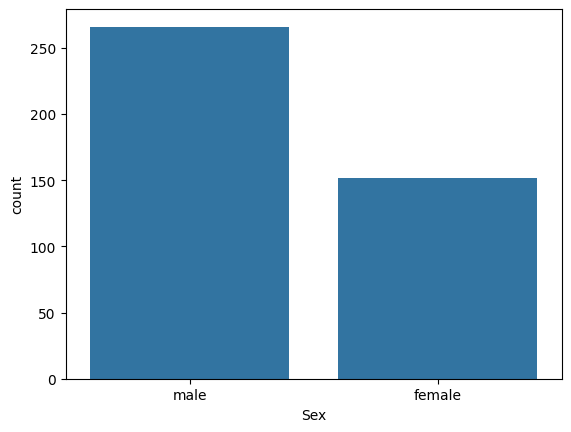

In [ ]:
sns.countplot(x='Sex',data=titanic)

There is a good data distribution among male and female so 'Sex' column is helpful for our analysis.

In [ ]:
titanic['Ticket'].nunique()

363

From the above results we can see ticket is serving as ticket id or ticket index number so this column can be dropped at this stage.

In [ ]:
titanic.drop('Ticket',axis=1,inplace=True)

In [ ]:
titanic['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

We can assume these to be the various places from where the passengers came from (place names)

In [ ]:
#Lets see the numerical columns now
titanic['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

We assume that these are the class numbers the passengers were travelling in such as
* 1 be first class
* 2 be second class
* 3 be third class

In [ ]:
#Lets replace the values with the above values and make this column catergorical
#To do this we have to convert this column to string type first
titanic['Pclass']=titanic['Pclass'].astype(str)

In [ ]:
titanic['Pclass'].replace({'1':'First class','2':'Second class','3':'Third class'},inplace=True)

In [ ]:
#Lets see now how this column looks
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Third class,male,34.5,0,0,7.8292,Q
1,1,Third class,female,47.0,1,0,7.0000,S
2,0,Second class,male,62.0,0,0,9.6875,Q
3,0,Third class,male,27.0,0,0,8.6625,S
4,1,Third class,female,22.0,1,1,12.2875,S


In [ ]:
titanic['Pclass'].value_counts()

Third class     218
First class     107
Second class     93
Name: Pclass, dtype: int64

In [ ]:
#Lets see the 'Fare' column
titanic['Fare'].nunique()

170

In [ ]:
titanic['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [ ]:
titanic['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

From the above columns we understand that these columns represent
* siblings and spouse of a person
* parents and children of a person

**CHECKING AND HANDLING OUTLIERS IF ANY**

In [ ]:
#Before this as we have converted the Pclass column to categorical lets remove that from the num_cols list
num_cols.remove('Pclass')
#Adding this column to cat_cols list
cat_cols.append('Pclass')

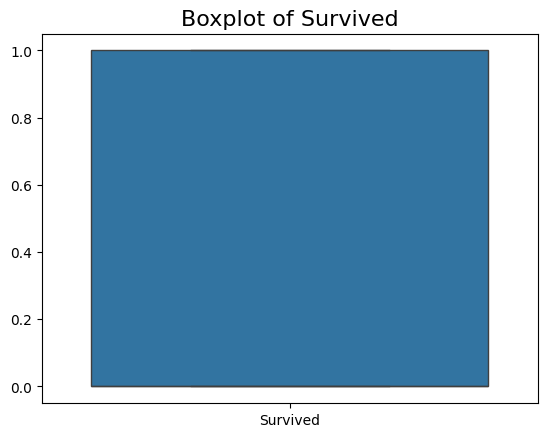

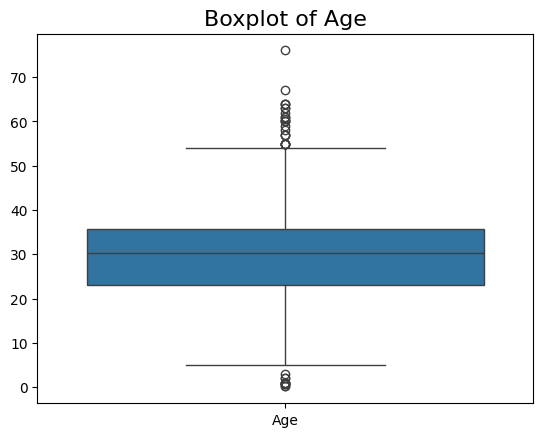

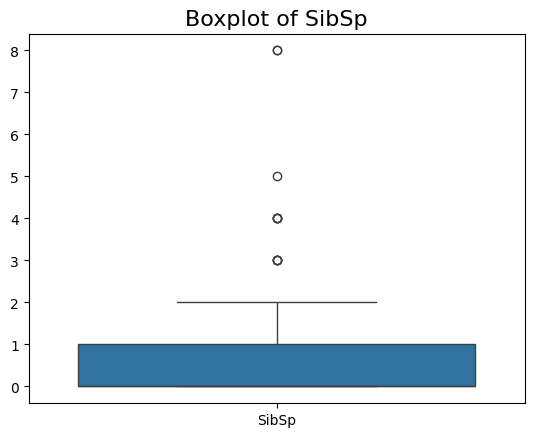

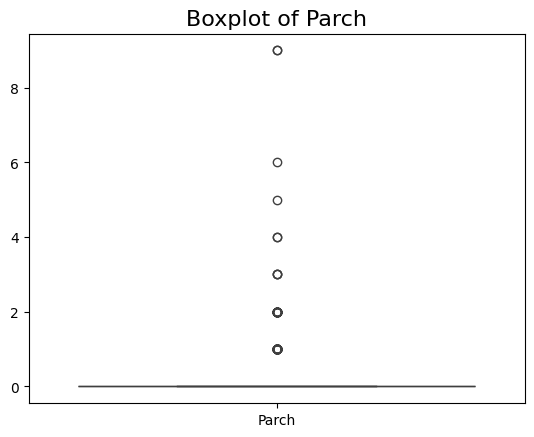

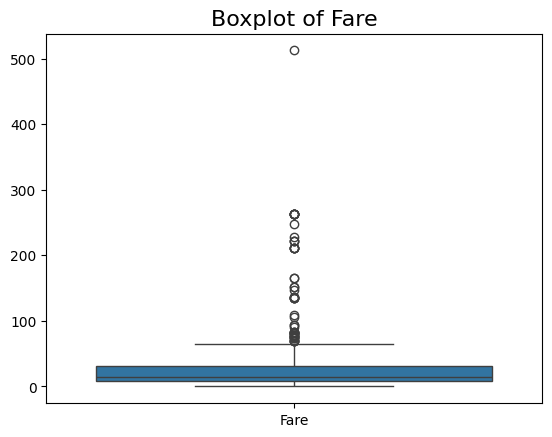

In [ ]:
# Lets plot the box plot for num_cols
for i in num_cols:
    sns.boxplot(titanic[[i]])
    plt.title("Boxplot of " + i)
    plt.show()

There are outliers present in age,sibsp,parch,fare columns.
* Age column outliers can be treated using the quartile range.
* We can ignore outliers in sibsp and parch as there are only one in each.
* Same way we can ignore the outliers in the Fare column also.

In [ ]:
#Lets fix the age column(we see outliers in both upper and lower bound)
Q3=titanic['Age'].quantile(0.75)
Q2=titanic['Age'].quantile(0.1)
titanic=titanic[(titanic['Age']<=Q3)]
titanic=titanic[(titanic['Age']>Q2)]

<Axes: ylabel='Age'>

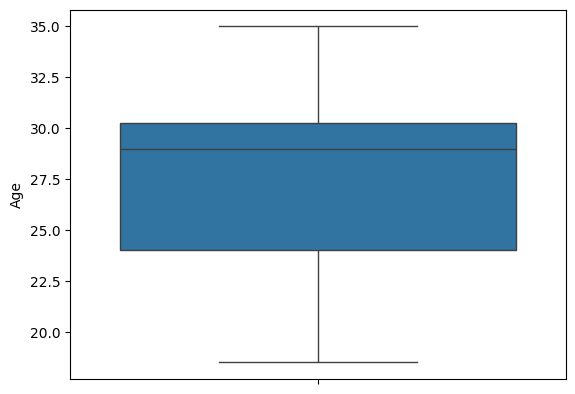

In [ ]:
#Lets check the box plot of Age column now
sns.boxplot(titanic['Age'])

BIVARIATE AND MULTIVARIATE ANALYSIS

In [ ]:
#Lets see how the target variable 'Survived' is related with other variables

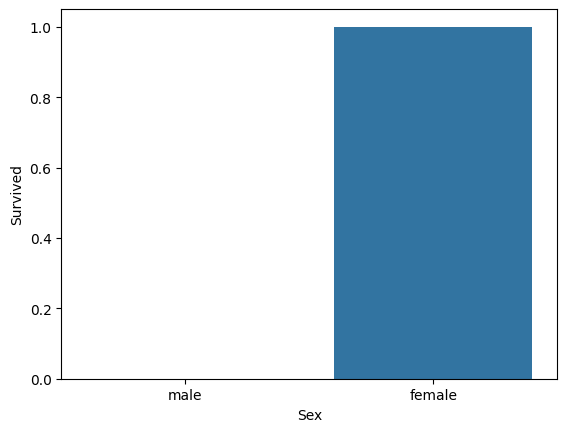

In [ ]:
sns.barplot(y='Survived',x='Sex',data=titanic)
plt.show()

In [ ]:
titanic[['Survived','Sex']].value_counts()

Survived  Sex   
0         male      172
1         female     87
dtype: int64

As we observe the survived ones are only female but this is something not acceptable. Lets check this.

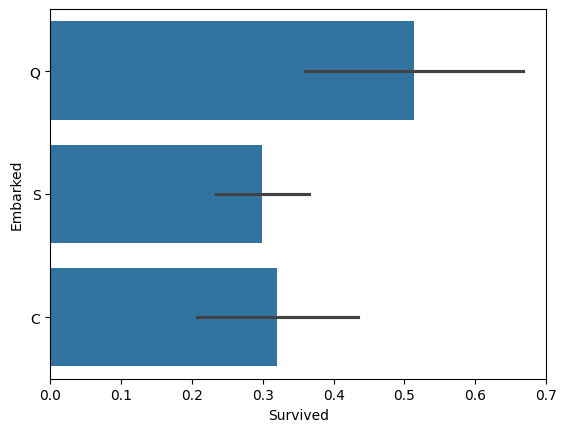

In [ ]:
sns.barplot(y='Embarked',x='Survived',data=titanic)
plt.show()

Observation: We can see more number of passengers from Q category.

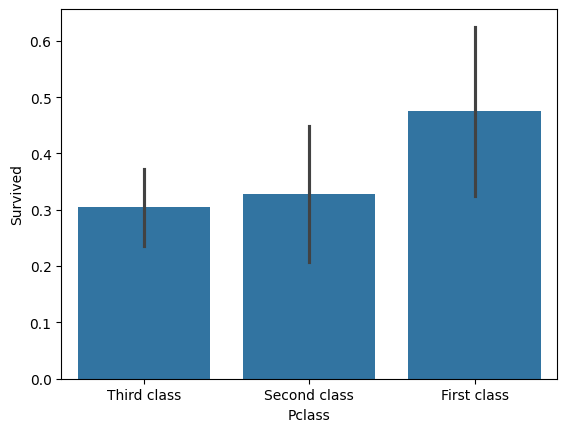

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=titanic)
plt.show()

Observation: We can see more survival rate in first class passengers.

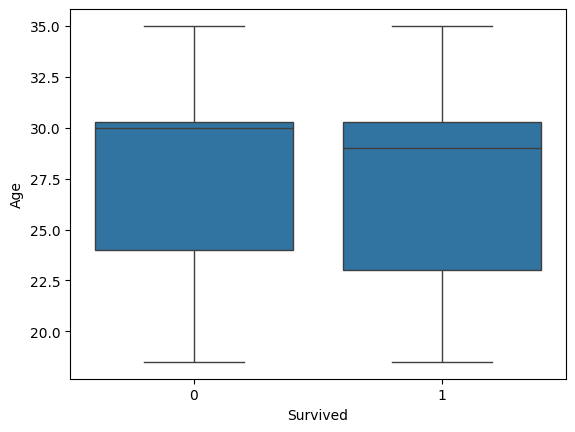

In [ ]:
sns.boxplot(y='Age',x='Survived',data=titanic)
plt.show()

**STEP 4 : DATA VISUALIZATION**

In [ ]:
#Lets see the correlation between variables and the target
titanic[['Age','Fare','Parch','SibSp','Survived']].corr()['Survived'][:]

Age        -0.061871
Fare        0.244222
Parch       0.183197
SibSp       0.157372
Survived    1.000000
Name: Survived, dtype: float64

<Axes: >

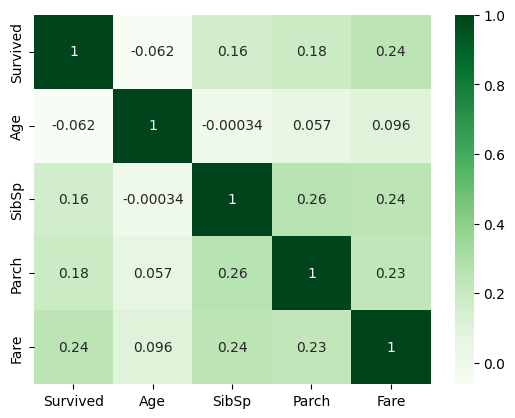

In [ ]:
#Creating a heatmap
sns.heatmap(titanic.corr(),annot = True,cmap='Greens')

Observation:
* target column is having high correlation with number of siblings,spouse,parents and children.
* It is having a negative correlation is age column.
* Fare is having good correlation with sibsp and parch (as we can say more number of people contribute more fare).

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Third class,male,34.5,0,0,7.8292,Q
3,0,Third class,male,27.0,0,0,8.6625,S
4,1,Third class,female,22.0,1,1,12.2875,S
6,1,Third class,female,30.0,0,0,7.6292,Q
7,0,Second class,male,26.0,1,1,29.0000,S


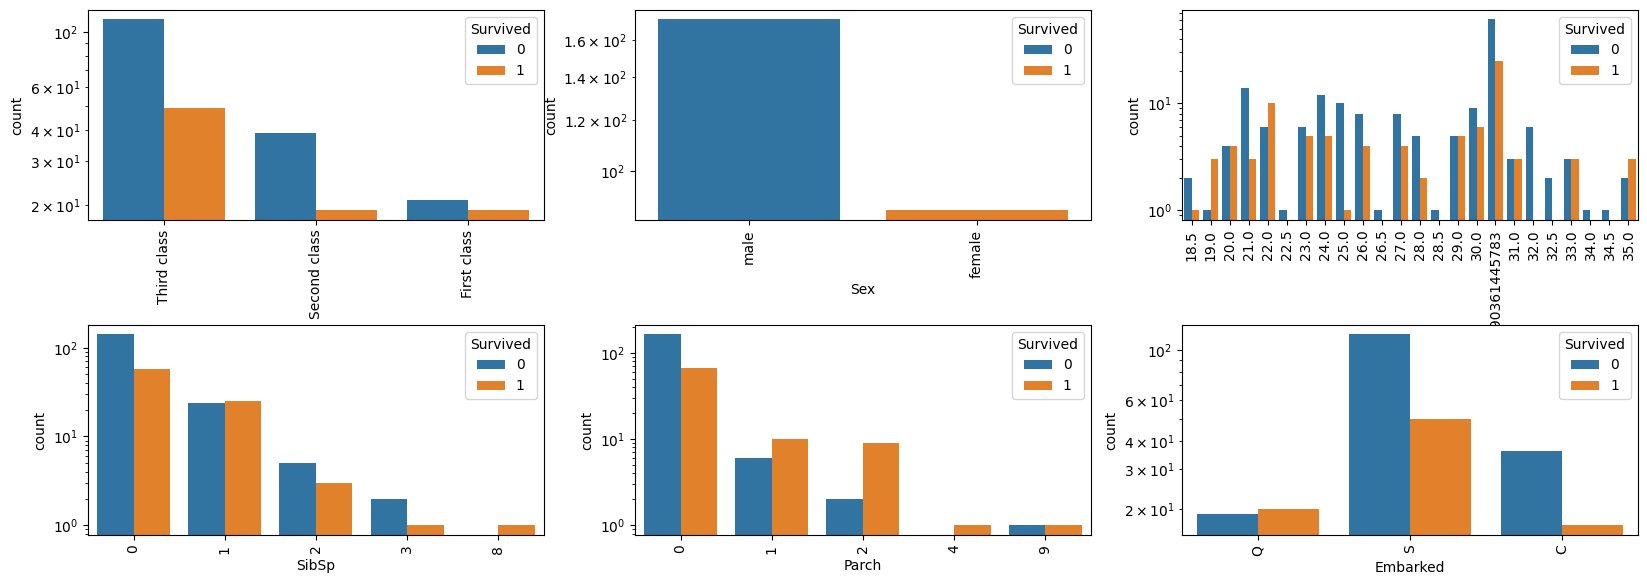

In [ ]:
flow = ['Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Embarked']
plt.figure(figsize = (20, 15))

for i in enumerate(flow):
    plt.subplot(4,3, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'Survived', data = titanic)

    plt.rcParams['axes.titlesize'] = 16

    plt.xticks(rotation = 90)
    plt.yscale('log')

**OBSERVATIONS:**
* From the above data we can say that there are more survivors from first class and third class.
* There are moe female survivors.
* There are more survivors with an average age ~ <=30
* The passengers with less number of siblings and spouse are likely to be having high survival rate here.
* The passengers with zero parents and children which means individuals are having more survival rate.
* We can see the passengers from Q category in Embarked feature are having high survival rate.